In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/viral-and-nonviral-gene/virus.fasta
/kaggle/input/viral-and-nonviral-gene/plasmid.fasta
/kaggle/input/viral-and-nonviral-gene/bacteria.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Chikungunya_virus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001263_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Zika_virus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001733_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Pseudomonas_aeruginosa.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_011100_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Escherichia_coli.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Staphylococcus_aureus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001422_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Human_papillomavirus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Clostridium_botulinum.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gen

In [2]:
!pip install --upgrade pip numpy scikit-learn pandas keras tensorflow torch dill matplotlib seaborn lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 91.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 78.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import dill

In [5]:
bacteria_lvl1 = []
with open("/kaggle/input/viral-and-nonviral-gene/bacteria.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        bacteria_lvl1.append(str(seq_record.seq))
virus_lvl1 =[]
with open("/kaggle/input/viral-and-nonviral-gene/virus.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        virus_lvl1.append(str(seq_record.seq))
plasmid_lvl1 =[]
with open("/kaggle/input/viral-and-nonviral-gene/plasmid.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        plasmid_lvl1.append(str(seq_record.seq))
print(len(plasmid_lvl1))

3896


In [6]:
from collections import Counter

def gc_content(sequence):
    g_count = sequence.count('G')
    c_count = sequence.count('C')
    total_bases = len(sequence)
    gc_percentage = (g_count + c_count) / total_bases * 100
    return gc_percentage

def at_content(sequence):
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    total_bases = len(sequence)
    at_percentage = (a_count + t_count) / total_bases * 100
    return at_percentage

def kmer_frequencies(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    return kmer_counts

def molecular_weight(sequence):
    nucleotide_weights = {
        'A': 331.2,
        'T': 322.2,
        'C': 307.2,
        'G': 347.2
    }
    weight = sum(nucleotide_weights[nuc] for nuc in sequence if nuc in nucleotide_weights)
    return weight

def hydrophobicity(sequence):
    hydrophobic_nucleotides = {'A', 'T'}
    hydrophilic_nucleotides = {'C', 'G'}
    hydrophobic_score = sum(1 for nuc in sequence if nuc in hydrophobic_nucleotides)
    hydrophilic_score = sum(1 for nuc in sequence if nuc in hydrophilic_nucleotides)
    return hydrophobic_score / len(sequence), hydrophilic_score / len(sequence)

def dinucleotide_frequencies(seq):
    dinucs = [seq[i:i+2] for i in range(len(seq)-1)]
    freq = Counter(dinucs)
    return {dinuc: freq[dinuc] / len(dinucs) for dinuc in freq}

def sequence_entropy(seq):
    freq = Counter(seq)
    probs = [freq[base] / len(seq) for base in freq]
    return -sum(p * np.log2(p) for p in probs)


def Kmers_contribution(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [7]:
all_sequences = {
    "bacteria": bacteria_lvl1,
    "virus": virus_lvl1,
    "plasmid": plasmid_lvl1
}

In [8]:
df_all_sequences = pd.DataFrame(columns=['Sequence', 'GC', 'AT', 'Molecular Wt', 'Hydrophobic Score', 'Hydrophilic Score', 'Sequence Entropy', 'Organism'])

In [9]:
for name, sequences in all_sequences.items():
    for seq in sequences:
        seq = seq.replace('\n', '')
        words = Kmers_contribution(seq)
        joined_words = ' '.join(words)
        gc = gc_content(seq)
        at = at_content(seq)
        mw = molecular_weight(seq)
        hydrophobic_score, hydrophilic_score = hydrophobicity(seq)
        s_entropy = sequence_entropy(seq)
        
        # Append data to the DataFrame
        df_all_sequences.loc[len(df_all_sequences)] = [joined_words, gc, at, mw, hydrophobic_score, hydrophilic_score, s_entropy, name]

# Check the final shape of the DataFrame
print(df_all_sequences.shape)

(11380, 8)


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_all_sequences['Organism'] = le.fit_transform(df_all_sequences['Organism'])

In [11]:
df_all_sequences.sample(10)

,Sequence,GC,AT,Molecular Wt,Hydrophobic Score,Hydrophilic Score,Sequence Entropy,Organism
10513,gataat ataatc taatcg aatcgg atcggc tcggcg cggc...,40.676230,59.323770,6.368984e+05,0.593238,0.406762,1.972393,1
1718,tgacat gacatc acatca catcaa atcaac tcaaca caac...,57.836429,42.163571,1.005023e+06,0.421636,0.578364,1.980866,0
3369,cagtcg agtcgg gtcggg tcgggg cggggt ggggtc gggt...,59.621716,40.377356,1.055873e+08,0.403774,0.596217,1.970995,0
1275,cagcgc agcgca gcgcac cgcact gcacta cactat acta...,54.516129,45.161290,1.004668e+05,0.451613,0.545161,2.001622,0
1210,tgaatc gaatcg aatcgc atcgcc tcgcca cgccac gcca...,50.324675,49.675325,4.038114e+05,0.496753,0.503247,1.996431,0
270,gtgaaa tgaaag gaaagt aaagtc aagtcc agtcca gtcc...,69.628647,30.371353,2.473818e+05,0.303714,0.696286,1.871692,0
11266,atgatt tgatta gattaa attaaa ttaaaa taaaaa aaaa...,46.676001,53.323999,9.461734e+07,0.533240,0.466760,1.996707,1
10662,tgcctc gcctcc cctccg ctccgg tccggc ccggcg cggc...,46.879643,53.120357,8.799674e+05,0.531204,0.468796,1.996835,1
2645,gattaa attaat ttaatt taatta aattac attacc ttac...,38.478642,61.521358,6.782139e+07,0.615214,0.384786,1.960020,0
7618,atgcac tgcacg gcacga cacgaa acgaac cgaacc gaac...,44.399732,55.600268,1.461191e+06,0.556003,0.443997,1.989557,1


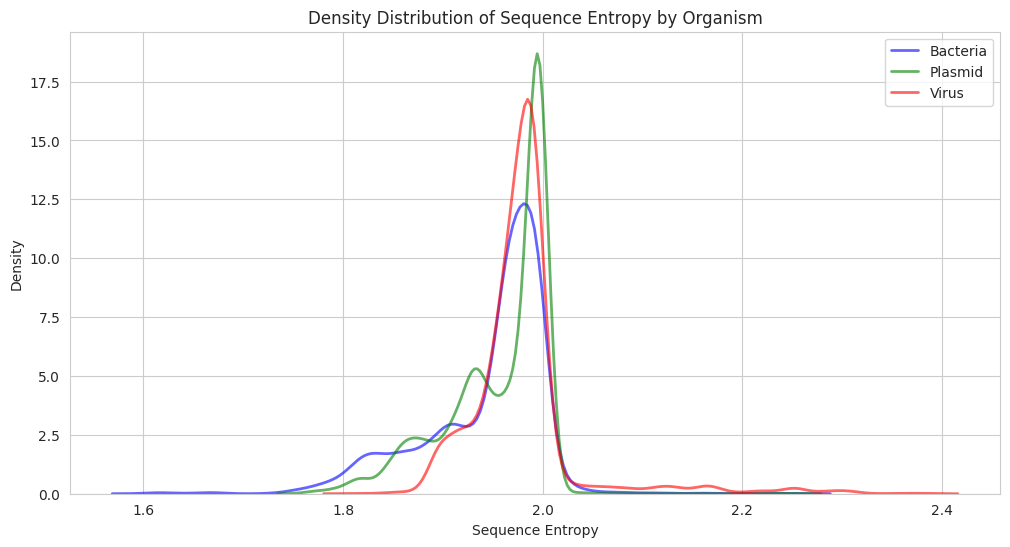

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter entropy values by organism type
df_entropy_0 = df_all_sequences[df_all_sequences['Organism'] == 0][['Sequence Entropy']].reset_index(drop=True)
df_entropy_1 = df_all_sequences[df_all_sequences['Organism'] == 1][['Sequence Entropy']].reset_index(drop=True)
df_entropy_2 = df_all_sequences[df_all_sequences['Organism'] == 2][['Sequence Entropy']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_entropy_0['Sequence Entropy'], label="Bacteria", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_1['Sequence Entropy'], label="Plasmid", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_2['Sequence Entropy'], label="Virus", color='red', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("Sequence Entropy")
plt.ylabel("Density")
plt.title("Density Distribution of Sequence Entropy by Organism")
plt.legend()
plt.show()


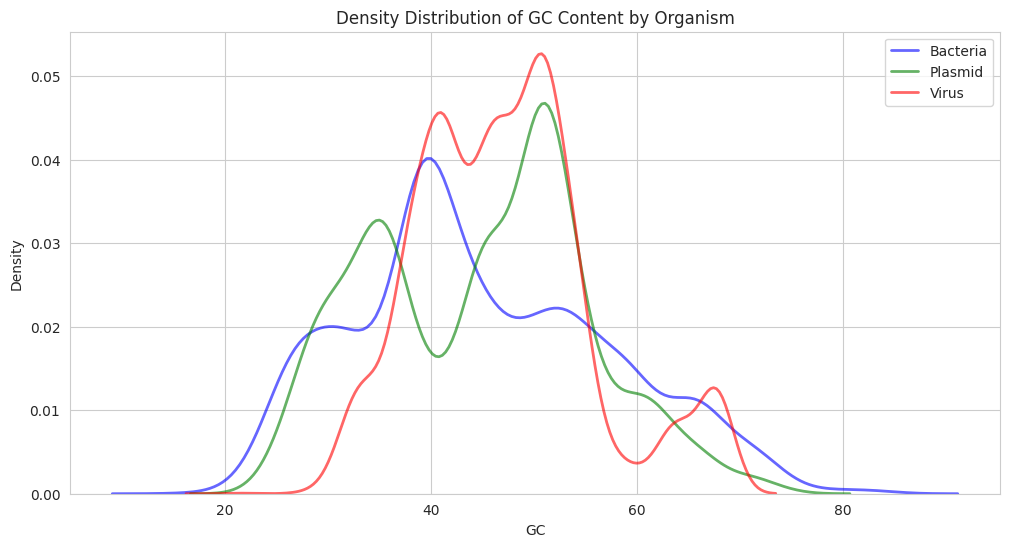

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter entropy values by organism type
df_entropy_0 = df_all_sequences[df_all_sequences['Organism'] == 0][['GC']].reset_index(drop=True)
df_entropy_1 = df_all_sequences[df_all_sequences['Organism'] == 1][['GC']].reset_index(drop=True)
df_entropy_2 = df_all_sequences[df_all_sequences['Organism'] == 2][['GC']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_entropy_0['GC'], label="Bacteria", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_1['GC'], label="Plasmid", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_2['GC'], label="Virus", color='red', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("GC")
plt.ylabel("Density")
plt.title("Density Distribution of GC Content by Organism")
plt.legend()
plt.show()

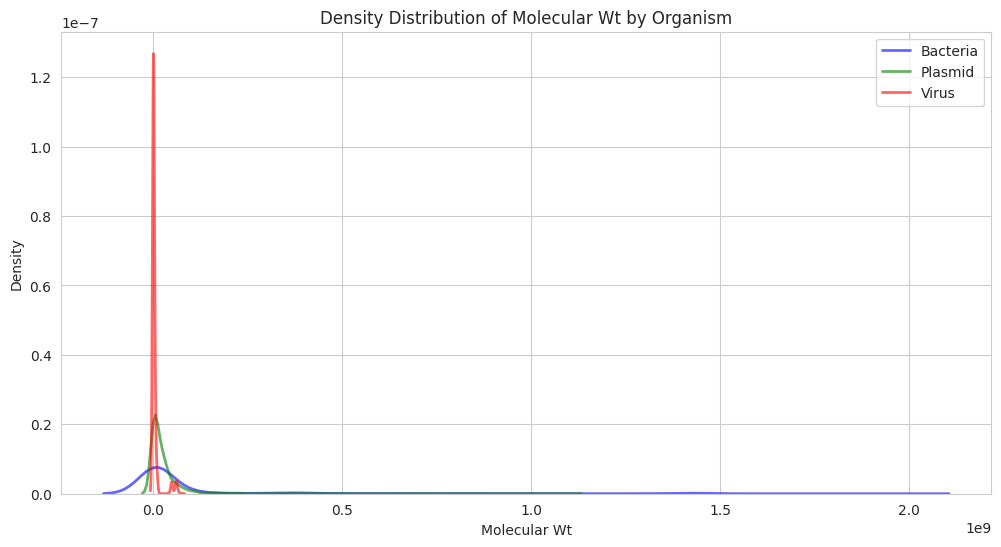

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter entropy values by organism type
df_entropy_0 = df_all_sequences[df_all_sequences['Organism'] == 0][['Molecular Wt']].reset_index(drop=True)
df_entropy_1 = df_all_sequences[df_all_sequences['Organism'] == 1][['Molecular Wt']].reset_index(drop=True)
df_entropy_2 = df_all_sequences[df_all_sequences['Organism'] == 2][['Molecular Wt']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_entropy_0['Molecular Wt'], label="Bacteria", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_1['Molecular Wt'], label="Plasmid", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_2['Molecular Wt'], label="Virus", color='red', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("Molecular Wt")
plt.ylabel("Density")
plt.title("Density Distribution of Molecular Wt by Organism")
plt.legend()
plt.show()

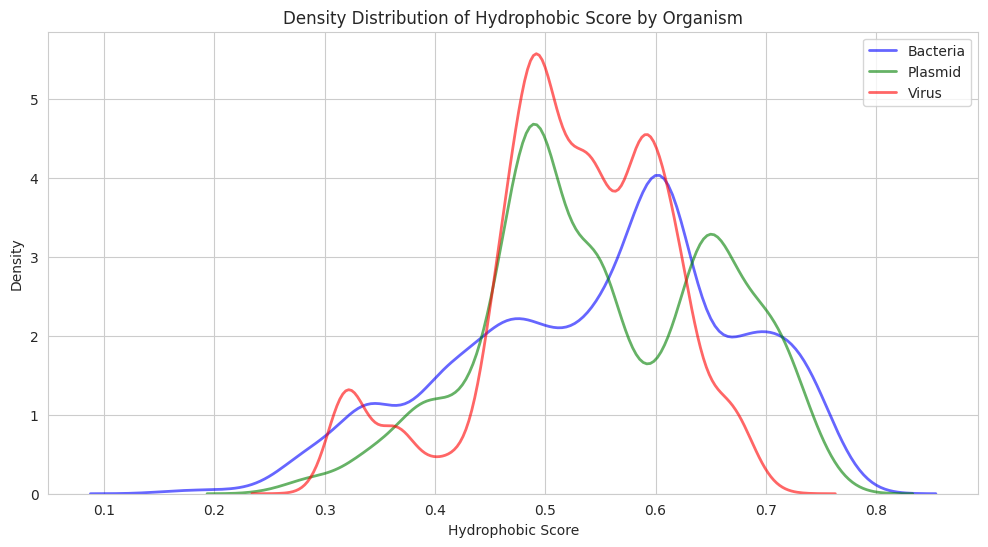

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter entropy values by organism type
df_entropy_0 = df_all_sequences[df_all_sequences['Organism'] == 0][['Hydrophobic Score']].reset_index(drop=True)
df_entropy_1 = df_all_sequences[df_all_sequences['Organism'] == 1][['Hydrophobic Score']].reset_index(drop=True)
df_entropy_2 = df_all_sequences[df_all_sequences['Organism'] == 2][['Hydrophobic Score']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_entropy_0['Hydrophobic Score'], label="Bacteria", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_1['Hydrophobic Score'], label="Plasmid", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_2['Hydrophobic Score'], label="Virus", color='red', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("Hydrophobic Score")
plt.ylabel("Density")
plt.title("Density Distribution of Hydrophobic Score by Organism")
plt.legend()
plt.show()

In [12]:
import dill
tfidf_path = "/kaggle/input/tfidf_gene/scikitlearn/default/1/tfidf .pkl"
with open(tfidf_path, "rb") as f:
    tfidf = dill.load(f)

In [13]:
sequence_features = tfidf.transform(df_all_sequences['Sequence']).toarray()
sequence_feature_names = tfidf.get_feature_names_out()
numeric_features = df_all_sequences.drop(columns=['Sequence', 'Organism']).values
combined_features = np.hstack((sequence_features, numeric_features))
target = df_all_sequences['Organism']
x_dense = pd.DataFrame(combined_features, columns=sequence_feature_names.tolist() + df_all_sequences.drop(columns=['Sequence', 'Organism']).columns.tolist())
x_dense.sample(10)

,aaaaaa,aaaaac,aaaaag,aaaaak,aaaaam,aaaaan,aaaaar,aaaaat,aaaaaw,aaaaay,...,yytgak,yytgcg,yytgct,yytggc,GC,AT,Molecular Wt,Hydrophobic Score,Hydrophilic Score,Sequence Entropy
5958,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,45.866667,54.133333,1.225220e+05,0.541333,0.458667,1.992323
9373,0.124582,0.061266,0.029293,0.0,0.0,0.0,0.0,0.070611,0.0,0.0,...,0.0,0.0,0.0,0.0,45.275754,54.724246,3.140125e+06,0.547242,0.452758,1.991628
6029,0.000000,0.018209,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,50.269179,49.730821,4.889852e+05,0.497308,0.502692,1.983243
3307,0.001966,0.004420,0.004227,0.0,0.0,0.0,0.0,0.002229,0.0,0.0,...,0.0,0.0,0.0,0.0,58.970450,41.015691,5.198155e+07,0.410157,0.589705,1.976466
2288,0.037485,0.028675,0.030033,0.0,0.0,0.0,0.0,0.023410,0.0,0.0,...,0.0,0.0,0.0,0.0,50.709465,49.290535,1.092542e+07,0.492905,0.507095,1.995892
5935,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,44.615385,55.384615,1.492980e+05,0.553846,0.446154,1.982472
2357,0.000000,0.000000,0.036900,0.0,0.0,0.0,0.0,0.077829,0.0,0.0,...,0.0,0.0,0.0,0.0,29.904306,70.095694,1.363356e+05,0.700957,0.299043,1.877120
8333,0.029499,0.024213,0.019361,0.0,0.0,0.0,0.0,0.031154,0.0,0.0,...,0.0,0.0,0.0,0.0,53.133176,46.866824,7.444011e+07,0.468668,0.531332,1.997071
4826,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,53.412463,46.587537,1.104234e+05,0.465875,0.534125,1.994910
9170,0.022169,0.021804,0.019460,0.0,0.0,0.0,0.0,0.019545,0.0,0.0,...,0.0,0.0,0.0,0.0,50.169837,49.830163,3.297983e+07,0.498302,0.501698,1.998967


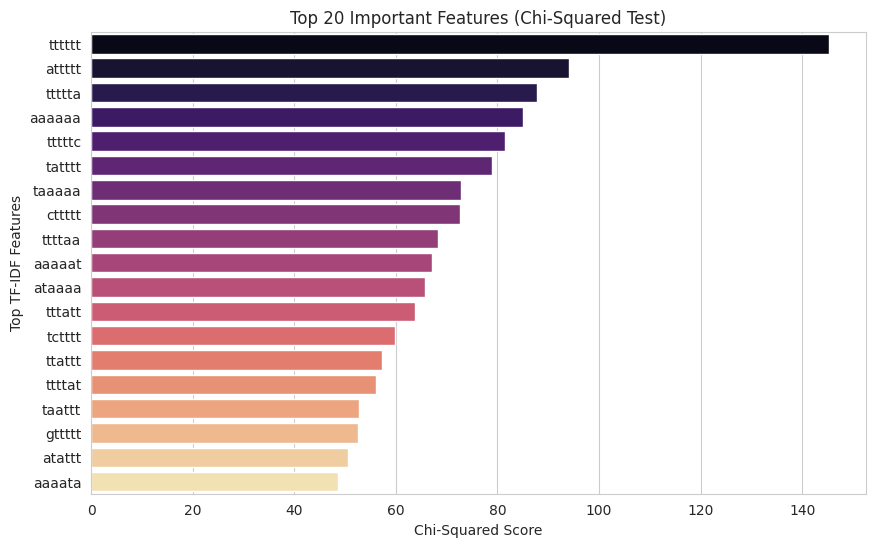

In [28]:
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out features with zero variance to avoid divide-by-zero errors
nonzero_var_idx = np.where(sequence_features.sum(axis=0) > 0)[0]
filtered_features = sequence_features[:, nonzero_var_idx]
filtered_feature_names = [sequence_feature_names[i] for i in nonzero_var_idx]

# Compute chi-squared scores
chi2_scores, _ = chi2(filtered_features, target)

# Sort features by chi-squared score
sorted_idx = np.argsort(chi2_scores)[::-1]  # Descending order
top_n = 20  # Number of top features to visualize
top_features = [filtered_feature_names[i] for i in sorted_idx[:top_n]]
top_chi2 = chi2_scores[sorted_idx[:top_n]]

# Drop "nnnnnn" if it exists
if "nnnnnn" in top_features:
    drop_idx = top_features.index("nnnnnn")
    top_features.pop(drop_idx)
    top_chi2 = np.delete(top_chi2, drop_idx)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_chi2, y=top_features, hue=top_features, dodge=False, palette="magma")

plt.xlabel("Chi-Squared Score")
plt.ylabel("Top TF-IDF Features")
plt.title("Top 20 Important Features (Chi-Squared Test)")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()


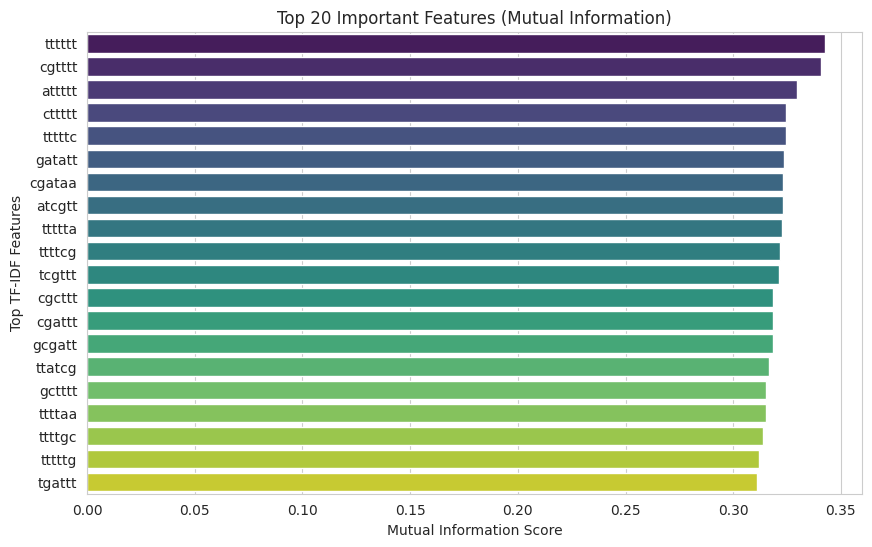

In [29]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Mutual Information scores
mi_scores = mutual_info_classif(sequence_features, target, discrete_features=False)

# Sort features by MI score
sorted_idx = np.argsort(mi_scores)[::-1]  # Descending order
top_n = 20  # Number of top features to visualize
top_features = [sequence_feature_names[i] for i in sorted_idx[:top_n]]
top_mi = mi_scores[sorted_idx[:top_n]]

# Drop "nnnnnn" if it exists
if "nnnnnn" in top_features:
    drop_idx = top_features.index("nnnnnn")
    top_features.pop(drop_idx)
    top_mi = np.delete(top_mi, drop_idx)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi, y=top_features, hue=top_features, dodge=False, palette="viridis")

plt.xlabel("Mutual Information Score")
plt.ylabel("Top TF-IDF Features")
plt.title("Top 20 Important Features (Mutual Information)")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_dense,target,test_size=0.2,random_state=42,stratify=target)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier
)
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import ComplementNB

# Initialize Label Binarizer
label_binarize = LabelBinarizer()

# Define hyperparameters
common_params = {
    "n_estimators": 3000,
    "learning_rate": 0.03,
    "max_depth": 7,
    "subsample": 0.7,
    "max_features": "log2",
    "min_samples_split": 10,
    "min_samples_leaf": 5,
}

# Define classifiers with the same parameters where applicable

classifiers_params = {
    "Gradient Boosting": GradientBoostingClassifier(
        **common_params,
        n_iter_no_change=10,
        verbose=1,
        warm_start=True,
    ),
    "LightGBM": lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=1000,
        max_depth=-1,
        objective="multiclass",
        metric="multi_logloss",
        verbose=-1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    "Logistic Regression": LogisticRegression(
        solver="lbfgs",
        max_iter=500,
        multi_class="multinomial",
        random_state=42,
    ),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        objective="multi:softprob",
        eval_metric="mlogloss",
        use_label_encoder=False,
        verbosity=0
    ),
    "Naïve Bayes": GaussianNB()
}

In [17]:
def train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers):
    best_model = None
    best_model_name = ""
    best_test_accuracy = 0  # Store the best test accuracy

    for model_name, model in classifiers.items():
        model.fit(x_train, y_train)

        # Binarize labels if multiclass
        n_classes = len(np.unique(y_train))
        label_binarize.fit(y_train)  # Fit on training data
        y_train_bin = label_binarize.transform(y_train) if n_classes > 2 else y_train
        y_test_bin = label_binarize.transform(y_test) if n_classes > 2 else y_test

        # Training evaluation
        y_train_pred = model.predict(x_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_cm = confusion_matrix(y_train, y_train_pred)

        print(f"\nModel: {model_name} (Training Data)")
        print(f"Training Accuracy: {train_accuracy:.2f}")
        print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

        ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=np.unique(y_train)).plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name} (Training Data)')
        plt.grid(False)
        plt.show()

        # Test evaluation
        y_test_pred = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_cm = confusion_matrix(y_test, y_test_pred)

        print(f"\nModel: {model_name} (Test Data)")
        print(f"Test Accuracy: {test_accuracy:.2f}")
        print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

        ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name} (Test Data)')
        plt.grid(False)
        plt.show()

        # ROC Curve
        if hasattr(model, "predict_proba"):
            y_test_proba = model.predict_proba(x_test)

            plt.figure(figsize=(10, 5))

            if n_classes > 2:  # Multi-class classification
                for i in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

            else:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve for {model_name}")
            plt.legend(loc="lower right")
            plt.show()
        
        # Select the best model
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model = model
            best_model_name = model_name

    print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_test_accuracy:.2f}")
    return best_model

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0890           0.0081            2.38m
         2           1.0751           0.0154            2.88m
         3           1.0552           0.0183            3.19m
         4           1.0435           0.0115            2.91m
         5           1.0260           0.0172            3.02m
         6           1.0085           0.0155            3.09m
         7           0.9926           0.0161            3.16m
         8           0.9801           0.0168            3.23m
         9           0.9671           0.0137            3.23m
        10           0.9515           0.0142            3.27m
        20           0.8374           0.0102            3.27m
        30           0.7490           0.0063            3.31m
        40           0.6786           0.0121            3.50m
        50           0.6268           0.0137            3.48m
        60           0.5801           0.0099            3.46m
       

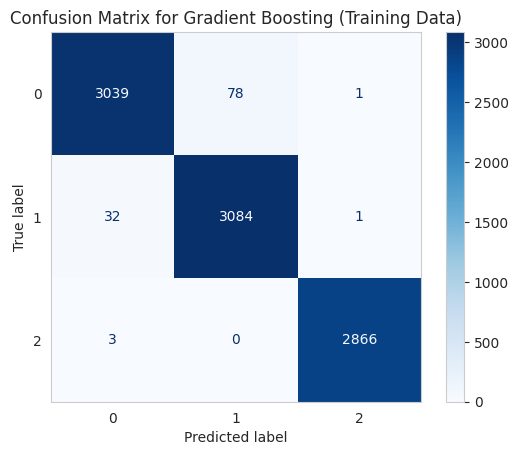


Model: Gradient Boosting (Test Data)
Test Accuracy: 0.93
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       780
           1       0.91      0.91      0.91       779
           2       0.99      0.98      0.99       717

    accuracy                           0.93      2276
   macro avg       0.93      0.93      0.93      2276
weighted avg       0.93      0.93      0.93      2276



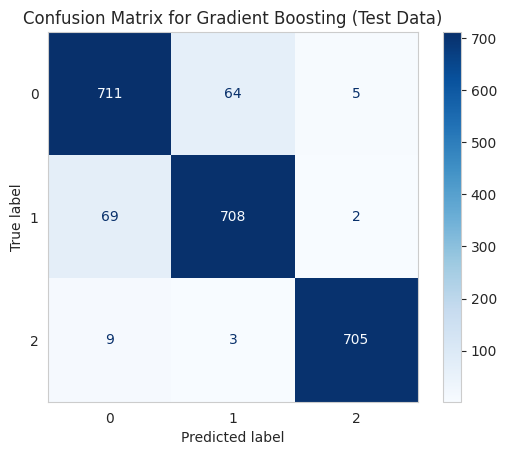

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model: LightGBM (Training Data)
Training Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3118
           1       0.98      1.00      0.99      3117
           2       1.00      1.00      1.00      2869

    accuracy                           0.99      9104
   macro avg       0.99      0.99      0.99      9104
weighted avg       0.99      0.99      0.99      9104



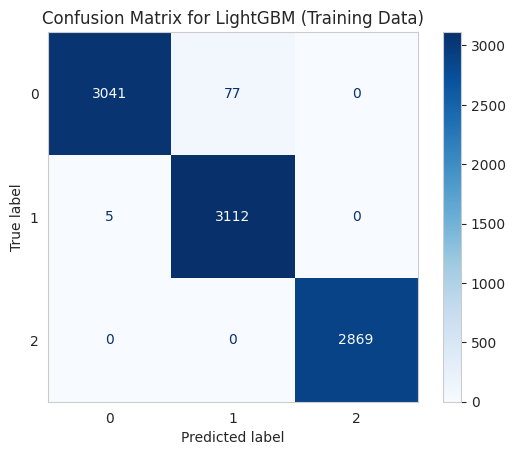

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model: LightGBM (Test Data)
Test Accuracy: 0.94
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       780
           1       0.92      0.91      0.92       779
           2       0.99      0.99      0.99       717

    accuracy                           0.94      2276
   macro avg       0.94      0.94      0.94      2276
weighted avg       0.94      0.94      0.94      2276



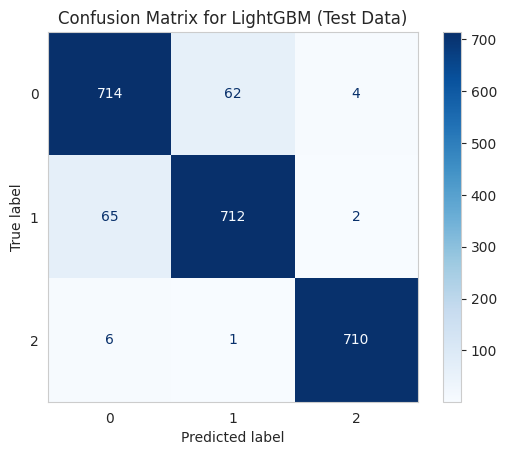


Model: Random Forest (Training Data)
Training Accuracy: 0.97
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3118
           1       0.97      0.96      0.96      3117
           2       0.97      1.00      0.99      2869

    accuracy                           0.97      9104
   macro avg       0.97      0.97      0.97      9104
weighted avg       0.97      0.97      0.97      9104



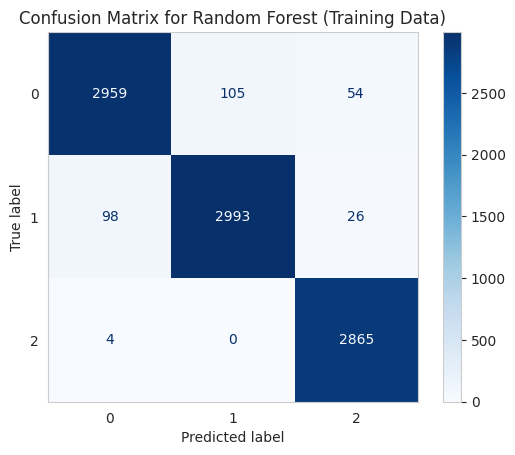


Model: Random Forest (Test Data)
Test Accuracy: 0.91
Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       780
           1       0.91      0.86      0.88       779
           2       0.96      0.98      0.97       717

    accuracy                           0.91      2276
   macro avg       0.91      0.91      0.91      2276
weighted avg       0.91      0.91      0.91      2276



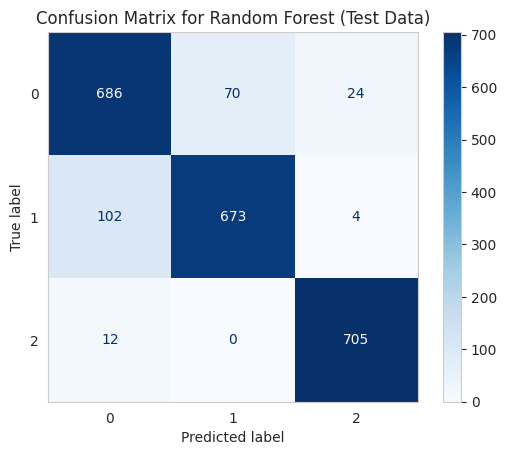

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


BrokenProcessPool: A result has failed to un-serialize. Please ensure that the objects returned by the function are always picklable.

In [43]:
best_model = train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers=classifiers_params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model: Logistic Regression (Training Data)
Training Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3118
           1       0.97      1.00      0.99      3117
           2       1.00      1.00      1.00      2869

    accuracy                           0.99      9104
   macro avg       0.99      0.99      0.99      9104
weighted avg       0.99      0.99      0.99      9104



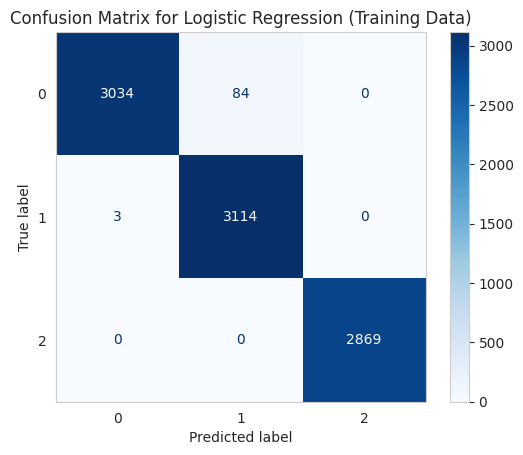


Model: Logistic Regression (Test Data)
Test Accuracy: 0.91
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       780
           1       0.85      0.93      0.89       779
           2       0.97      0.97      0.97       717

    accuracy                           0.91      2276
   macro avg       0.91      0.91      0.91      2276
weighted avg       0.91      0.91      0.91      2276



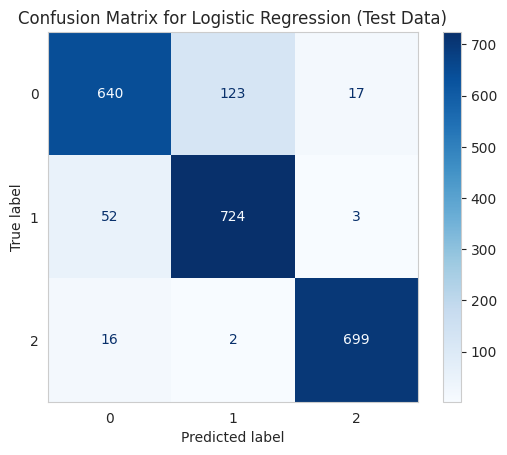


Model: XGBoost (Training Data)
Training Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3118
           1       0.98      1.00      0.99      3117
           2       1.00      1.00      1.00      2869

    accuracy                           0.99      9104
   macro avg       0.99      0.99      0.99      9104
weighted avg       0.99      0.99      0.99      9104



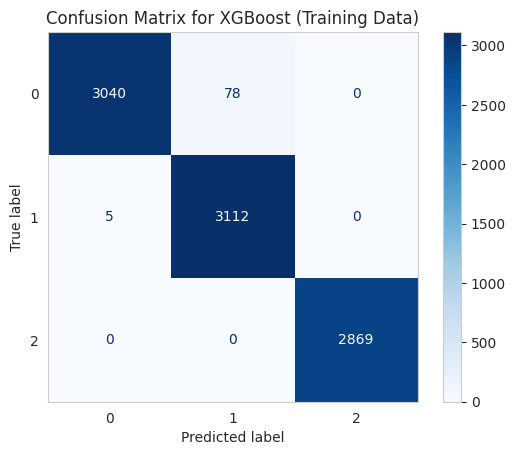


Model: XGBoost (Test Data)
Test Accuracy: 0.93
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       780
           1       0.91      0.91      0.91       779
           2       0.99      0.99      0.99       717

    accuracy                           0.93      2276
   macro avg       0.93      0.93      0.93      2276
weighted avg       0.93      0.93      0.93      2276



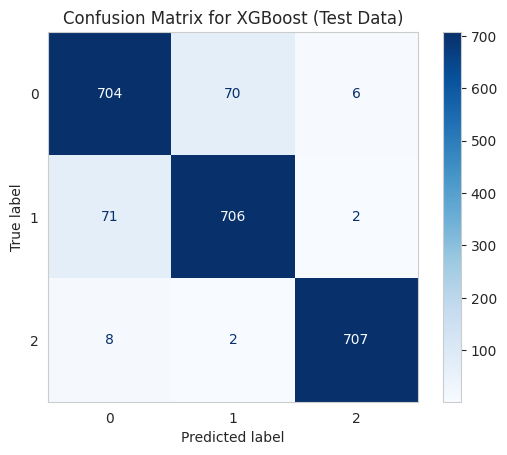

ValueError: Negative values in data passed to ComplementNB (input X).

In [44]:
train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers={
    "Logistic Regression": LogisticRegression(
        solver="lbfgs",
        max_iter=500,
        multi_class="multinomial",
        random_state=42,
    ),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        objective="multi:softprob",
        eval_metric="mlogloss",
        use_label_encoder=False,
        verbosity=0
    ),
    "Naïve Bayes": ComplementNB(
        alpha=1.0,  # Smoothing parameter
        fit_prior=True
    )
})


Model: Naïve Bayes (Training Data)
Training Accuracy: 0.45
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.32      3118
           1       0.39      1.00      0.56      3117
           2       0.98      0.15      0.26      2869

    accuracy                           0.45      9104
   macro avg       0.79      0.45      0.38      9104
weighted avg       0.78      0.45      0.38      9104



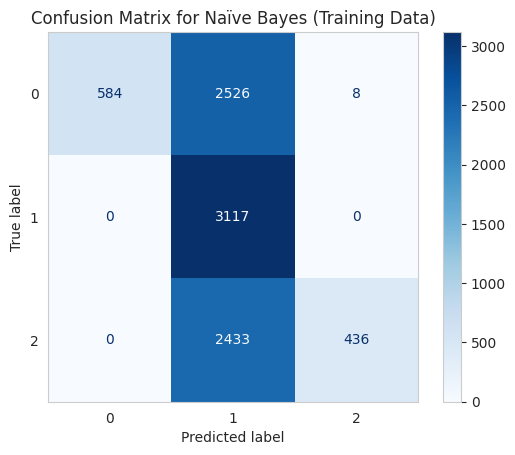


Model: Naïve Bayes (Test Data)
Test Accuracy: 0.42
Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.16      0.26       780
           1       0.38      0.99      0.55       779
           2       0.84      0.08      0.14       717

    accuracy                           0.42      2276
   macro avg       0.63      0.41      0.32      2276
weighted avg       0.63      0.42      0.32      2276



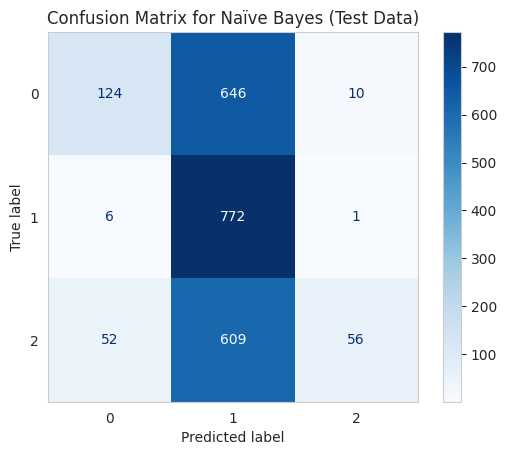


Best Model: Naïve Bayes with least overfitting: 0.04


GaussianNB()

In [45]:
from sklearn.naive_bayes import GaussianNB

train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers={
    "Naïve Bayes": GaussianNB()
})


In [19]:
encoding_dict = {class_label: index for index, class_label in enumerate(le.classes_)}
print(encoding_dict)

{'bacteria': 0, 'plasmid': 1, 'virus': 2}


In [53]:
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [55]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
torch.manual_seed(42)


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [57]:
class CustomDataset(Dataset):
  def __init__(self,features,targets):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.targets = torch.tensor(targets,dtype=torch.long)
  def __len__(self):
    return len(self.features)
  def __getitem__(self,idx):
    return self.features[idx],self.targets[idx]

In [58]:
train_dataset = CustomDataset(x_train,y_train)
test_dataset = CustomDataset(x_test,y_test)

In [59]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory=True)

In [60]:
len(train_loader)

285

In [104]:
class MyNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(512,256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(256,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,3)
    )
  def forward(self,x):
    return self.model(x)

In [129]:
epochs = 1000
learning_rate = 0.0001

In [130]:
model = MyNN(x_train.shape[1])
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [131]:
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features,batch_targets in train_loader:
    batch_features = batch_features.to(device)
    batch_targets = batch_targets.to(device)
    outputs = model(batch_features)
    loss = criterion(outputs,batch_targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_epoch_loss += loss.item()
  print(f'Epoch: {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}')

Epoch: 1/1000, Loss: 1.0256207842575877
Epoch: 2/1000, Loss: 0.9012462879482068
Epoch: 3/1000, Loss: 0.8475021305837129
Epoch: 4/1000, Loss: 0.8142045458157857
Epoch: 5/1000, Loss: 0.7788385138177035
Epoch: 6/1000, Loss: 0.7570908642651742
Epoch: 7/1000, Loss: 0.7371308860025908
Epoch: 8/1000, Loss: 0.7131433296621892
Epoch: 9/1000, Loss: 0.6956301735158552
Epoch: 10/1000, Loss: 0.6802639898500944
Epoch: 11/1000, Loss: 0.662280317565851
Epoch: 12/1000, Loss: 0.6475439732534843
Epoch: 13/1000, Loss: 0.6359219530172515
Epoch: 14/1000, Loss: 0.6145093484928733
Epoch: 15/1000, Loss: 0.6035483188796462
Epoch: 16/1000, Loss: 0.5901894376988996
Epoch: 17/1000, Loss: 0.5735466962320763
Epoch: 18/1000, Loss: 0.560200618233597
Epoch: 19/1000, Loss: 0.544891606611118
Epoch: 20/1000, Loss: 0.536666844079369
Epoch: 21/1000, Loss: 0.5306876675078743
Epoch: 22/1000, Loss: 0.5064821363541118
Epoch: 23/1000, Loss: 0.499015284212012
Epoch: 24/1000, Loss: 0.49376528869595443
Epoch: 25/1000, Loss: 0.47678

In [135]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=32216, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=128, out_features=64, bias=True)
    (13): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [136]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_targets in train_loader:
    batch_features = batch_features.to(device)
    batch_targets = batch_targets.to(device)
    outputs = model(batch_features)
    _,predicted = torch.max(outputs,1)
    # print(predicted)
    total += batch_targets.shape[0]
    correct += (predicted == batch_targets).sum().item()
print(f'Accuracy: {100*correct/total}')

Accuracy: 99.01142355008787


In [137]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_targets in test_loader:
    batch_features = batch_features.to(device)
    batch_targets = batch_targets.to(device)
    outputs = model(batch_features)
    _,predicted = torch.max(outputs,1)
    # print(predicted)
    total += batch_targets.shape[0]
    correct += (predicted == batch_targets).sum().item()
print(f'Accuracy: {100*correct/total}')

Accuracy: 93.05799648506151


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0778           0.0181            2.77m
         2           1.0594           0.0177            3.09m
         3           1.0445           0.0147            2.86m
         4           1.0289           0.0167            2.78m
         5           1.0134           0.0134            2.71m
         6           0.9984           0.0166            2.70m
         7           0.9865           0.0129            2.67m
         8           0.9702           0.0131            2.67m
         9           0.9615           0.0113            2.57m
        10           0.9498           0.0154            2.58m
        20           0.8472           0.0083            2.48m
        30           0.7564           0.0003            2.48m
        40           0.6926           0.0203            2.45m
        50           0.6345           0.0022            2.44m
        60           0.5892           0.0160            2.45m
       

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ut


Model: Stacking_Classifier (Training Data)
Training Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3118
           1       0.98      0.99      0.99      3117
           2       1.00      1.00      1.00      2869

    accuracy                           0.99      9104
   macro avg       0.99      0.99      0.99      9104
weighted avg       0.99      0.99      0.99      9104



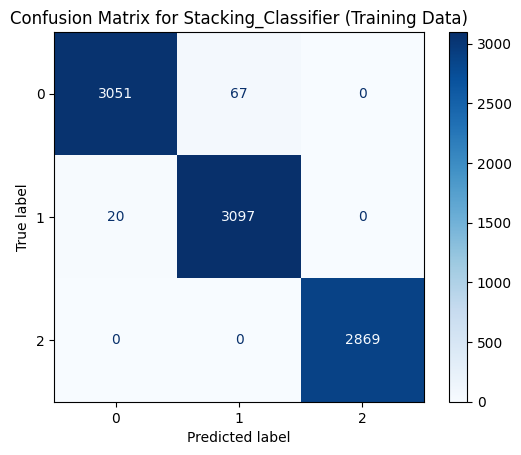

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model: Stacking_Classifier (Test Data)
Test Accuracy: 0.93
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       780
           1       0.92      0.89      0.91       779
           2       1.00      0.98      0.99       717

    accuracy                           0.93      2276
   macro avg       0.93      0.93      0.93      2276
weighted avg       0.93      0.93      0.93      2276



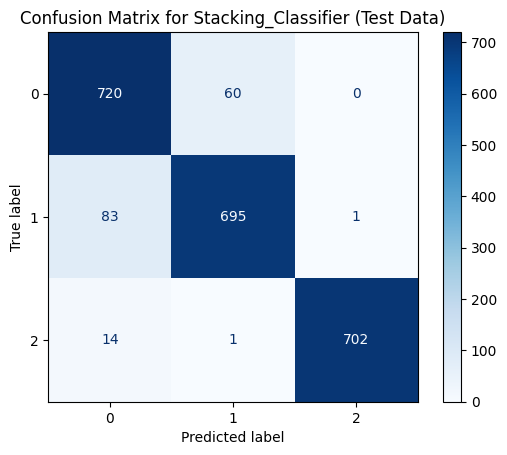


Best Model: Stacking_Classifier with least overfitting: 0.06


StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.03,
                                                           max_depth=7,
                                                           max_features='log2',
                                                           min_samples_leaf=5,
                                                           min_samples_split=10,
                                                           n_estimators=3000,
                                                           n_iter_no_change=10,
                                                           subsample=0.7,
                                                           verbose=1,
                                                           warm_start=True)),
                               ('lgbm',
                                LGBMClassifier(learning_rate=0.05,
                                               metric='multi_logloss',
                                               n_estimators=1000,
                                               objective='multiclass',
                                               verbose=-1))],
                   final_estimator=RandomForestClassifier(), passthrough=True)

In [142]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define classifiers with common hyperparameters
classifiers_params_2 = {
    "Gradient Boosting": GradientBoostingClassifier(
        **common_params,
        n_iter_no_change=10,
        verbose=1,
        warm_start=True,
    ),
    "LightGBM": lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=1000,
        max_depth=-1,
        objective="multiclass",
        metric="multi_logloss",
        verbose=-1
    )
}

# Base learners
base_learners = [
    ('gb', classifiers_params_2["Gradient Boosting"]),
    ('lgbm', classifiers_params_2["LightGBM"]),
]

# Stacking Classifier with RF as meta-learner (without hyperparameters)
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=RandomForestClassifier(),  # RF without hyperparameters
    passthrough=True  # Allows meta-learner to see original features
)
train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers={
    "Stacking_Classifier": stacking_model
})


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model: LightGBM (Training Data)
Training Accuracy: 0.99
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3118
           1       0.98      1.00      0.99      3117
           2       1.00      1.00      1.00      2869

    accuracy                           0.99      9104
   macro avg       0.99      0.99      0.99      9104
weighted avg       0.99      0.99      0.99      9104



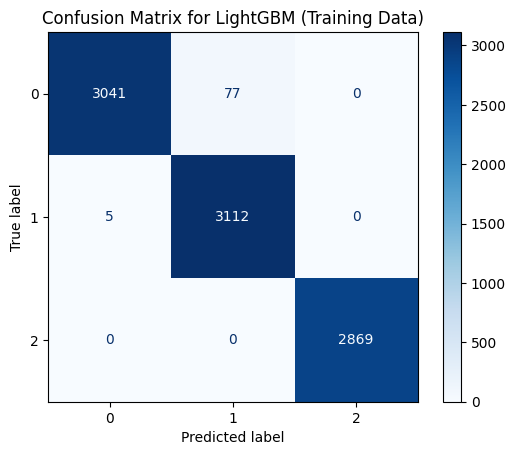

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model: LightGBM (Test Data)
Test Accuracy: 0.94
Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       780
           1       0.92      0.91      0.92       779
           2       0.99      0.99      0.99       717

    accuracy                           0.94      2276
   macro avg       0.94      0.94      0.94      2276
weighted avg       0.94      0.94      0.94      2276



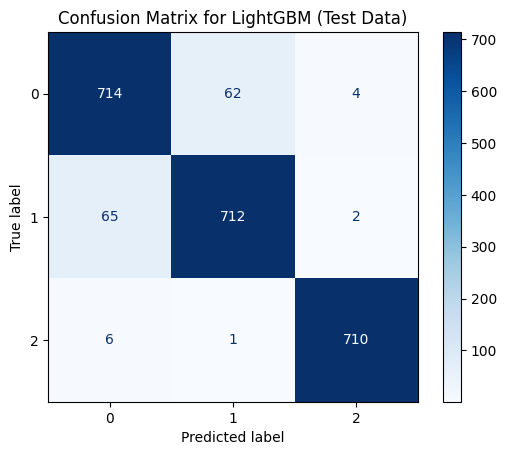

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


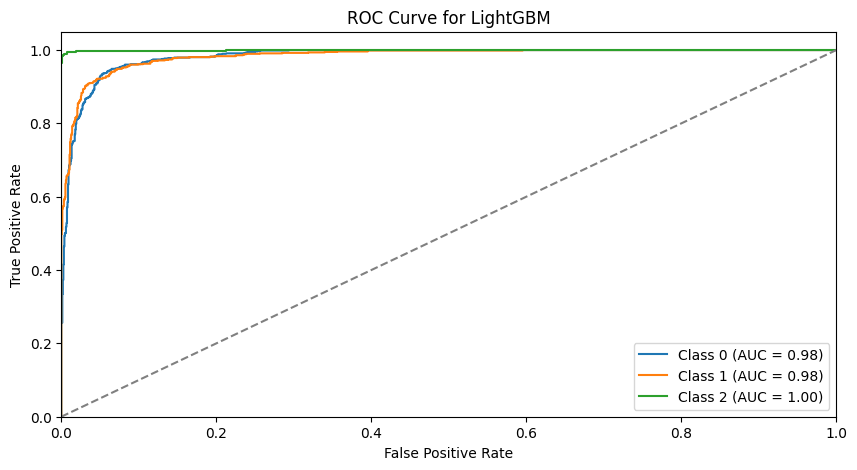


Best Model: LightGBM with Test Accuracy: 0.94


In [18]:
best_model = train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers={
    "LightGBM": lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=1000,
        max_depth=-1,
        objective="multiclass",
        metric="multi_logloss",
        verbose=-1
    ),
})